/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Next 10 days' sunspot predictions:
71383    54.647696
71384    54.622631
71385    55.905427
71386    58.025755
71387    60.078439
71388    59.756567
71389    59.728650
71390    59.604564
71391    59.490847
71392    59.422467
Name: predicted_mean, dtype: float64


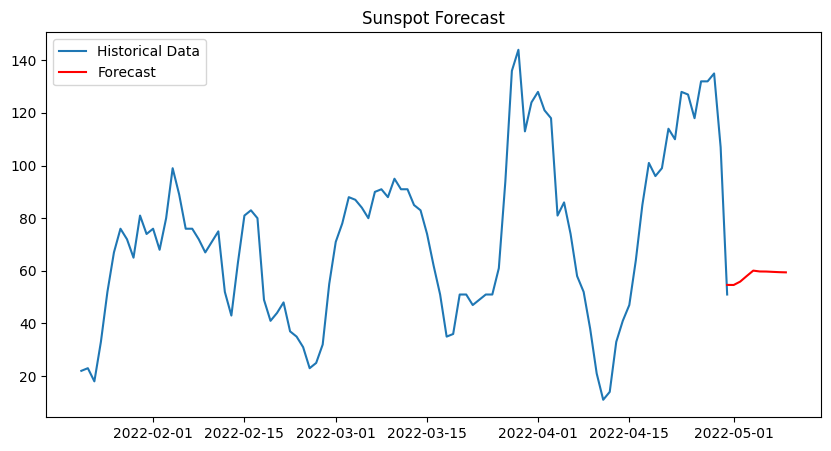

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your cleaned dataset
file_path = '/content/day_sunspot.csv'
data = pd.read_csv(file_path)

# Preprocessing
data = data.replace(-1, pd.NA)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)

# Use only the 'Daily Total Sunspot Number' column
sunspots = data['Daily Total Sunspot Number'].dropna()

# Convert the 'Daily Total Sunspot Number' column to numeric,
# errors='coerce' will replace any non-numeric values with NaN
sunspots = pd.to_numeric(sunspots, errors='coerce')

# Drop any rows with NaN values after the conversion
sunspots = sunspots.dropna()

# Fit ARIMA model (you might need to adjust p, d, q values)
model = ARIMA(sunspots, order=(5, 1, 0))  # Example order, tune these
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)

# Display forecast
print("Next 10 days' sunspot predictions:")
print(forecast)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sunspots[-100:], label='Historical Data')
plt.plot(pd.date_range(sunspots.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.title('Sunspot Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

     Year  Predicted Sunspots
205  2023           89.310733
206  2024           93.382649
207  2025           82.632115
208  2026           64.217387
209  2027           42.660297
210  2028           29.996983
211  2029           28.711743
212  2030           37.784804
213  2031           51.582614
214  2032           64.851228


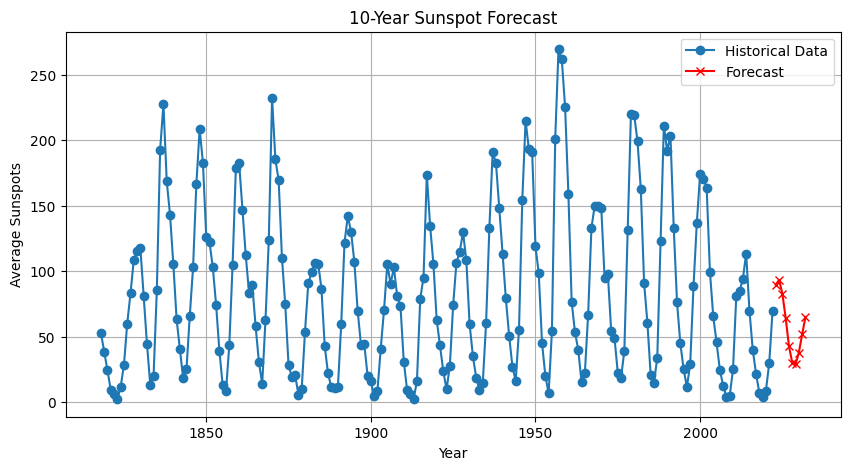

In [2]:

# Replace invalid values with NaN and parse the date
data = data.replace(-1, pd.NA)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)

# Aggregate data by year and ensure numeric type
data['Year'] = data.index.year
yearly_data = data.groupby('Year')['Daily Total Sunspot Number'].mean()
# Convert yearly_data to numeric, forcing non-numeric to NaN and then drop NaNs
yearly_data = pd.to_numeric(yearly_data, errors='coerce').dropna()

# Fit ARIMA model
model = ARIMA(yearly_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast next 10 years
forecast = model_fit.forecast(steps=10)

# Generate years for the forecast
future_years = list(range(yearly_data.index[-1] + 1, yearly_data.index[-1] + 11))

# Create a DataFrame for predictions
forecast_df = pd.DataFrame({'Year': future_years, 'Predicted Sunspots': forecast})

# Display results
print(forecast_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(yearly_data, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', marker='x', color='red')
plt.title('10-Year Sunspot Forecast')
plt.xlabel('Year')
plt.ylabel('Average Sunspots')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

     Month  Predicted Sunspots
205   2023           89.310733
206   2024           93.382649
207   2025           82.632115
208   2026           64.217387
209   2027           42.660297
210   2028           29.996983
211   2029           28.711743
212   2030           37.784804
213   2031           51.582614
214   2032           64.851228


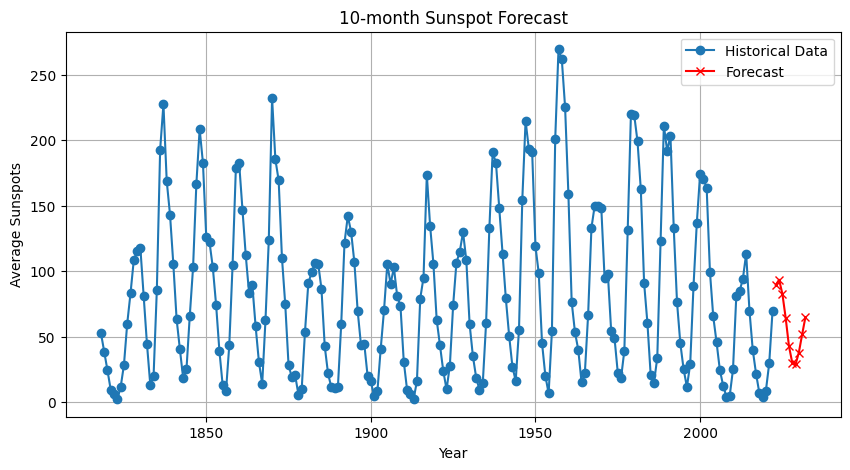

In [3]:

# Aggregate data by year and ensure numeric type
data['Month'] = data.index.year
yearly_data = data.groupby('Month')['Daily Total Sunspot Number'].mean()
# Convert yearly_data to numeric, forcing non-numeric to NaN and then drop NaNs
yearly_data = pd.to_numeric(yearly_data, errors='coerce').dropna()

# Fit ARIMA model
model = ARIMA(yearly_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast next 10 years
forecast = model_fit.forecast(steps=10)

# Generate years for the forecast
future_years = list(range(yearly_data.index[-1] + 1, yearly_data.index[-1] + 11))

# Create a DataFrame for predictions
forecast_df = pd.DataFrame({'Month': future_years, 'Predicted Sunspots': forecast})

# Display results
print(forecast_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(yearly_data, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', marker='x', color='red')
plt.title('10-month Sunspot Forecast')
plt.xlabel('Year')
plt.ylabel('Average Sunspots')
plt.legend()
plt.grid()
plt.show()

<ipython-input-4-5bb71062747e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Daily Total Sunspot Number'].resample('M').mean()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/stat

   Months Ahead  Predicted Sunspots
0             1           74.510875
1             6           74.680406
2             9           74.166384


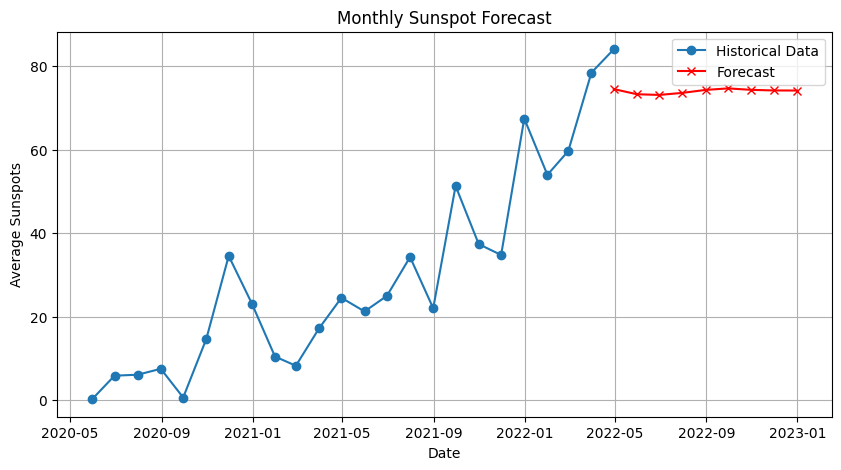

In [4]:



# Aggregate data by month and ensure numeric type
monthly_data = data['Daily Total Sunspot Number'].resample('M').mean()
# Convert monthly_data to numeric, forcing non-numeric to NaN and then drop NaNs
monthly_data = pd.to_numeric(monthly_data, errors='coerce').dropna()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast for 1, 6, and 9 months
forecast_steps = [1, 6, 9]
forecast = model_fit.forecast(steps=max(forecast_steps))

# Display results
forecast_results = forecast.iloc[[step - 1 for step in forecast_steps]]
forecast_df = pd.DataFrame({
    'Months Ahead': forecast_steps,
    'Predicted Sunspots': forecast_results.values
})
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data[-24:], label='Historical Data', marker='o')
plt.plot(
    pd.date_range(monthly_data.index[-1], periods=max(forecast_steps), freq='M'),
    forecast,
    label='Forecast',
    color='red',
    marker='x'
)
plt.title('Monthly Sunspot Forecast')
plt.xlabel('Date')
plt.ylabel('Average Sunspots')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

   Days Ahead  Predicted Sunspots
0         100           59.459841
1         200           59.459841
2         365           59.459841


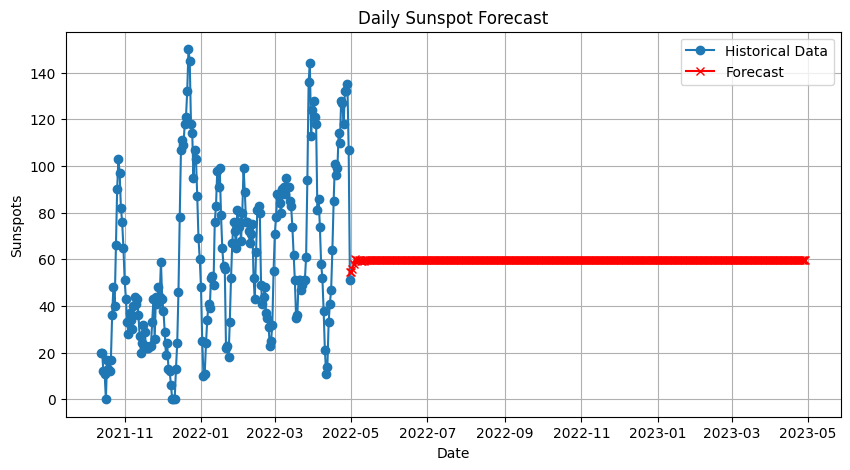

In [5]:


# Use the 'Daily Total Sunspot Number' column for modeling
daily_data = data['Daily Total Sunspot Number']

# Ensure daily_data is numeric, coercing errors to NaN, then drop NaNs
daily_data = pd.to_numeric(daily_data, errors='coerce').dropna()

# Fit ARIMA model
model = ARIMA(daily_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast for 365 days
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)

# Extract predictions for 100, 200, and 365 days
forecast_results = forecast.iloc[[99, 199, 364]]
forecast_df = pd.DataFrame({
    'Days Ahead': [100, 200, 365],
    'Predicted Sunspots': forecast_results.values
})
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data[-200:], label='Historical Data', marker='o')
plt.plot(
    pd.date_range(daily_data.index[-1], periods=forecast_steps, freq='D'),
    forecast,
    label='Forecast',
    color='red',
    marker='x'
)
plt.title('Daily Sunspot Forecast')
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

   Years Ahead  Predicted Sunspots
0            1           89.310733
1           10           64.851228
2           20           60.994526


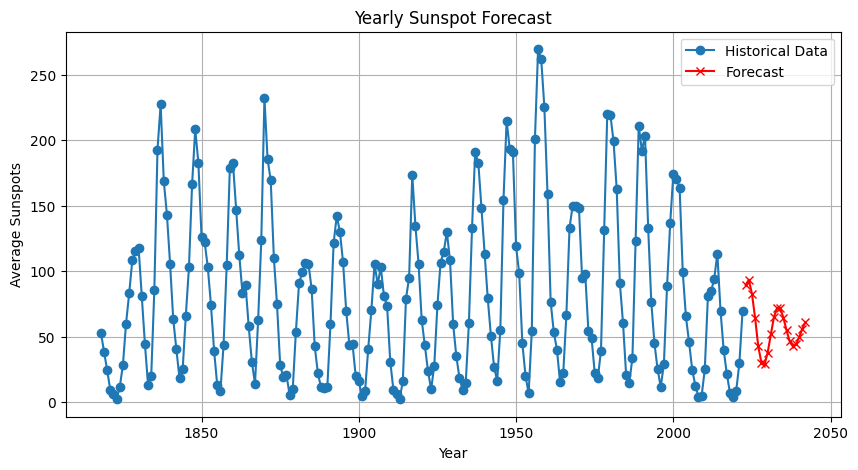

In [6]:

# Aggregate data by year
data['Year'] = data.index.year
yearly_data = data.groupby('Year')['Daily Total Sunspot Number'].mean()

# Explicitly convert yearly_data to numeric, handling errors
yearly_data = pd.to_numeric(yearly_data, errors='coerce').dropna()
# If you still get error, try to force to float type:
# yearly_data = yearly_data.astype(float)


# Fit ARIMA model
model = ARIMA(yearly_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast for 20 years
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast years
future_years = range(yearly_data.index[-1] + 1, yearly_data.index[-1] + 1 + forecast_steps)

# Extract predictions for 1, 10, and 20 years
forecast_results = forecast.iloc[[0, 9, 19]]
forecast_df = pd.DataFrame({
    'Years Ahead': [1, 10, 20],
    'Predicted Sunspots': forecast_results.values
})
print(forecast_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(yearly_data, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', marker='x', color='red')
plt.title('Yearly Sunspot Forecast')
plt.xlabel('Year')
plt.ylabel('Average Sunspots')
plt.legend()
plt.grid()
plt.show()

In [9]:
!pip install scikit-learn
import sklearn.metrics

# Assuming 'actual_values' and 'predicted_values' hold your data
# Replace with your actual historical and forecasted data
actual_values = monthly_data[-20:].values  # Use the last 20 months of monthly data to match forecast length
predicted_values = forecast.values # Use all 20 predicted values

# Calculate performance metrics
mae = sklearn.metrics.mean_absolute_error(actual_values, predicted_values)
mape = sklearn.metrics.mean_absolute_percentage_error(actual_values, predicted_values)
r2 = sklearn.metrics.r2_score(actual_values, predicted_values)

# Now you can print the results
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")

MAE: 31.292756913695378
MAPE: 8.603942620975
R²: -1.7285551573358213


INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/l30e_vvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/aiy7gewv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16099', 'data', 'file=/tmp/tmpy1bmxhjo/l30e_vvt.json', 'init=/tmp/tmpy1bmxhjo/aiy7gewv.json', 'output', 'file=/tmp/tmpy1bmxhjo/prophet_modeln8d0bf92/prophet_model-20241129015940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 59.24294640364958
MAPE: 0.6761613773185375
R²: -2.178651627140971


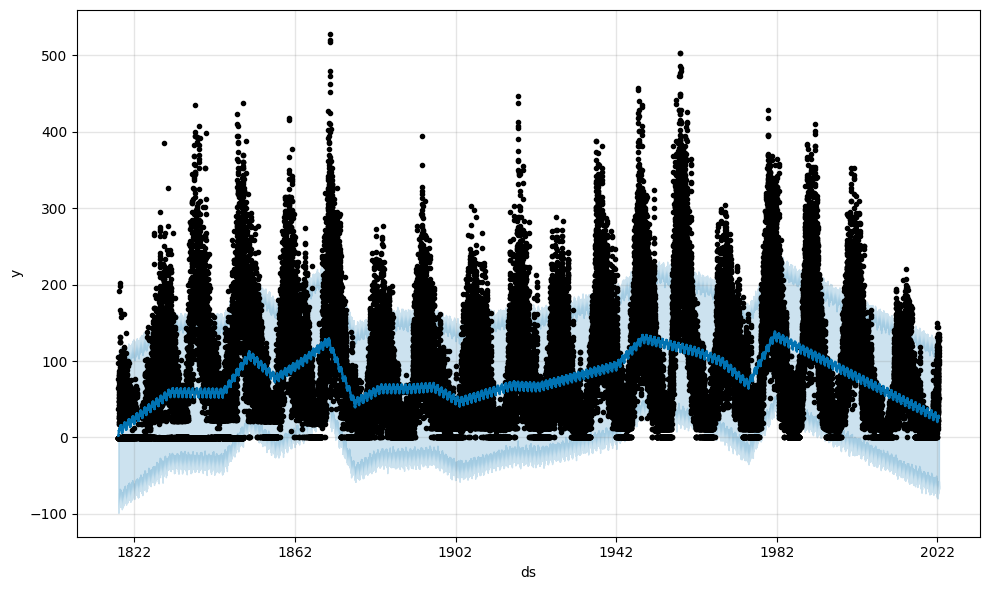

In [15]:

# Prepare dataset for Prophet
daily_data = data[['Daily Total Sunspot Number']].reset_index()
daily_data.rename(columns={'Date': 'ds', 'Daily Total Sunspot Number': 'y'}, inplace=True)

# Define the model and add seasonality
model = Prophet()
model.add_seasonality(name='daily', period=365.25, fourier_order=8)  # Yearly seasonality

# Fit the model to historical data
model.fit(daily_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30, freq='D')  # Specify periods and frequency directly
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

# Evaluate the model using MAE, MAPE, and R²
y_true = daily_data['y'].iloc[-30:]  # Last 30 days as test data
y_pred = forecast['yhat'][-30:]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")


<ipython-input-17-466ebec4c9bd>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/xiycyp9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/sneqqt0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49828', 'data', 'file=/tmp/tmpy1bmxhjo/xiycyp9u.json', 'init=/tmp/tmpy1bmxhjo/sneqqt0x.json', 'output', 'file=/tmp/tmpy1bmxhjo/prophet_modeltbfkpijq/prophet_model-20241129020242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:02:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
0

MAE (Monthly): 561.4427315789217
MAPE (Monthly): 0.2887633828931637
R² (Monthly): -0.7877289374396346


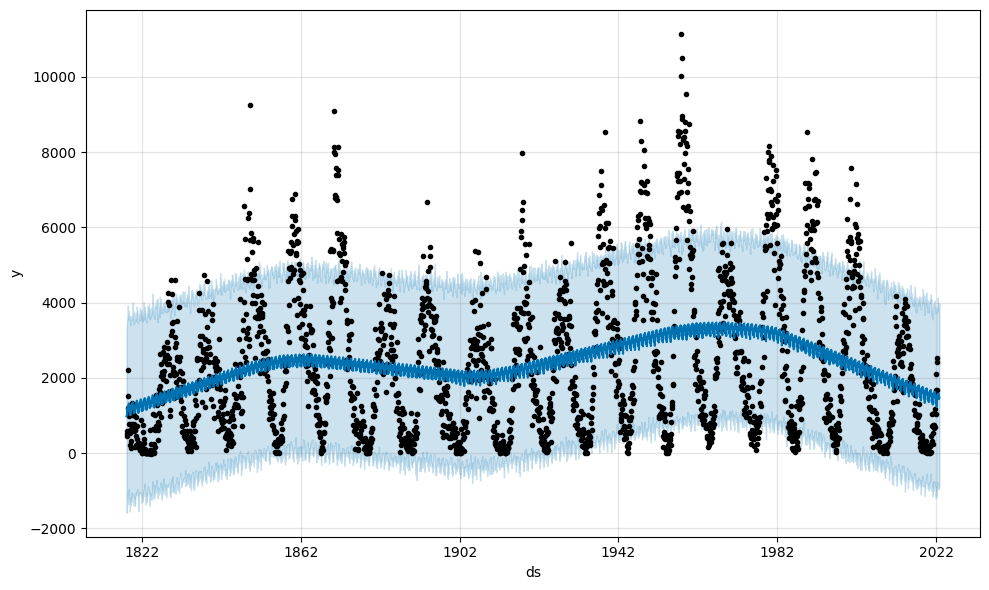

In [17]:
# Aggregate the data to monthly frequency using mean for 'Date'
monthly_data = data.resample('M')['Daily Total Sunspot Number'].sum().reset_index()
# Rename the columns for Prophet
monthly_data.rename(columns={'Date': 'ds', 'Daily Total Sunspot Number': 'y'}, inplace=True)
# Define and fit the model
monthly_model = Prophet()
monthly_model.fit(monthly_data)

# Forecast for the next 6 months
# The first argument should be the number of periods (6 in this case)
future_monthly = monthly_model.make_future_dataframe(periods=6, freq='M')
forecast_monthly = monthly_model.predict(future_monthly)

# Plot the forecast
monthly_model.plot(forecast_monthly)

# Evaluate the model using MAE, MAPE, and R²
y_true_monthly = monthly_data['y'].iloc[-6:]  # Last 6 months as test data
y_pred_monthly = forecast_monthly['yhat'][-6:]

mae_monthly = mean_absolute_error(y_true_monthly, y_pred_monthly)
mape_monthly = mean_absolute_percentage_error(y_true_monthly, y_pred_monthly)
r2_monthly = r2_score(y_true_monthly, y_pred_monthly)

print(f"MAE (Monthly): {mae_monthly}")
print(f"MAPE (Monthly): {mape_monthly}")
print(f"R² (Monthly): {r2_monthly}")

<ipython-input-21-2f1630f9debf>:3: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/lv4z77wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/mhklqjcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44906', 'data', 'file=/tmp/tmpy1bmxhjo/lv4z77wg.json', 'init=/tmp/tmpy1bmxhjo/mhklqjcb.json', 'output', 'file=/tmp/tmpy1bmxhjo/prophet_model8cu3ng5w/prophet_model-20241129020506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
0

MAE (Yearly): 19210.772890663975
MAPE (Yearly): 5.277845819417264
R² (Yearly): -1.58551635729621


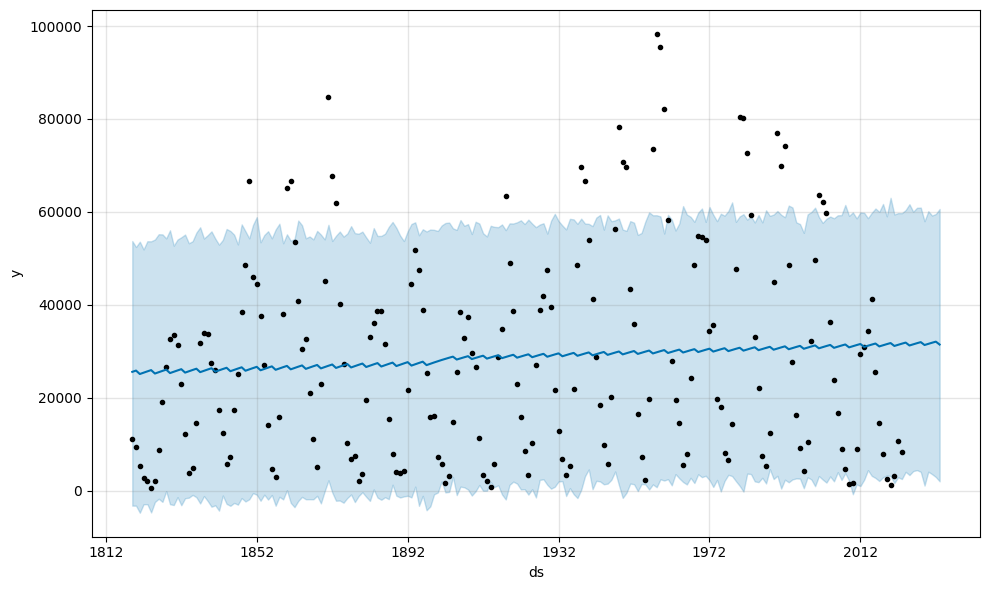

In [21]:
# Aggregate the data to yearly frequency using mean for 'Daily Total Sunspot Number'
# and keep the first date of the year as 'ds'
yearly_data = data.resample('Y')['Daily Total Sunspot Number'].sum().reset_index()
# Extract the year from the 'Date' column and create the end-of-year date
yearly_data['Date'] = yearly_data['Date'].dt.year.astype(str) + '-12-31'  # End of year date
yearly_data['Date'] = pd.to_datetime(yearly_data['Date'])  # Convert to datetime
yearly_data.rename(columns={'Date': 'ds', 'Daily Total Sunspot Number': 'y'}, inplace=True)


# Define and fit the model
yearly_model = Prophet()
yearly_model.fit(yearly_data)

# Forecast for the next 10 years
# Removed 'yearly_data' as the first argument
future_yearly = yearly_model.make_future_dataframe(periods=10, freq='Y')
forecast_yearly = yearly_model.predict(future_yearly)

# Plot the forecast
yearly_model.plot(forecast_yearly)

# Evaluate the model using MAE, MAPE, and R²
y_true_yearly = yearly_data['y'].iloc[-10:]  # Last 10 years as test data
y_pred_yearly = forecast_yearly['yhat'][-10:]

mae_yearly = mean_absolute_error(y_true_yearly, y_pred_yearly)
mape_yearly = mean_absolute_percentage_error(y_true_yearly, y_pred_yearly)
r2_yearly = r2_score(y_true_yearly, y_pred_yearly)

print(f"MAE (Yearly): {mae_yearly}")
print(f"MAPE (Yearly): {mape_yearly}")
print(f"R² (Yearly): {r2_yearly}")

In [22]:
!pip install plotly
import plotly.graph_objects as go
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data_prophet = data[['Date', 'Daily Total Sunspot Number']].rename(columns={'Date': 'ds', 'Daily Total Sunspot Number': 'y'})

# Define the Prophet model
model = Prophet()

# Fit the model on the historical data
model.fit(data_prophet)

# Forecast between specific dates
start_date = '2023-11-20'  # Replace with your desired start date
end_date = '2023-12-20'    # Replace with your desired end date

future = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='D'), columns=['ds'])
forecast = model.predict(future)

# Create Plotly figure for visualization
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(x=data_prophet['ds'], y=data_prophet['y'],
                         mode='lines', name='Historical Data',
                         line=dict(color='blue')))

# Add forecasted data trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Forecasted Data',
                         line=dict(color='red', dash='dash')))

# Add confidence intervals
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'],
                         mode='lines', name='Lower Confidence Interval',
                         line=dict(color='grey', dash='dot')))

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'],
                         mode='lines', name='Upper Confidence Interval',
                         line=dict(color='grey', dash='dot')))

# Update layout
fig.update_layout(title='Sunspot Forecasting',
                  xaxis_title='Date',
                  yaxis_title='Sunspot Number',
                  template='plotly_dark')

# Show plot
fig.show()

# Evaluate the model (using the same date range as the forecast)
# Filter historical data for evaluation
# Ensure the date range is within the available historical data
# Adjust start_date and end_date if necessary
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

historical_data_eval = data_prophet[
    (data_prophet['ds'] >= start_date) & (data_prophet['ds'] <= end_date)
]

# Check if historical_data_eval is empty and adjust dates if necessary
if historical_data_eval.empty:
    print("Warning: No historical data found for the specified date range.")
    # Adjust start_date and end_date to fall within the historical data range
    # For example, use the minimum and maximum dates in data_prophet
    start_date = data_prophet['ds'].min()
    end_date = data_prophet['ds'].max()
    historical_data_eval = data_prophet[
        (data_prophet['ds'] <= end_date)
    ]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/rxf_cpo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy1bmxhjo/w0k1g0k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66036', 'data', 'file=/tmp/tmpy1bmxhjo/rxf_cpo9.json', 'init=/tmp/tmpy1bmxhjo/w0k1g0k2.json', 'output', 'file=/tmp/tmpy1bmxhjo/prophet_model5vntr2st/prophet_model-20241129020526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
